In [1]:
import configparser
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

import sys
sys.path.append('..')

from data.data_util import cluster_data, plot_difference_gender_age

config = configparser.ConfigParser()
config.read("../config.ini")

['../config.ini']

In [2]:
dataset = 'chexpert'
id = "99adfb36-7414-4e22-9c24-f2eda0c1f0de"

# Load data
data = pd.read_csv(f"{config[dataset]['labels']}")
data = cluster_data(data, id, dataset_name=dataset, pca=np.load(f"../data/dataset/experiment/{id}/tsne_{dataset}_{id}.npy"), tsne=np.load(f"../data/dataset/experiment/{id}/pca_{dataset}_{id}.npy"), cluster_type='spectral')

/Users/dilermando/dev/Fairness/analysis/../data/data_util.py:102: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data[f'pca_{i}'] = pca[:, i]
/Users/dilermando/dev/Fairness/analysis/../data/data_util.py:102: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data[f'pca_{i}'] = pca[:, i]
/Users/dilermando/dev/Fairness/analysis/../data/data_util.py:102: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once us

In [3]:
plot_difference_gender_age(data, dataset=dataset, dir=f"../data/dataset/experiment/{id}/gender_age_pca.jpg", title=f"PCA {dataset}", save=False)

/opt/homebrew/Caskroom/miniconda/base/envs/fairness/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/homebrew/Caskroom/miniconda/base/envs/fairness/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/homebrew/Caskroom/miniconda/base/envs/fairness/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/homebrew/Caskroom/miniconda/base/envs/fairness/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarni

<Figure size 640x480 with 0 Axes>

/opt/homebrew/Caskroom/miniconda/base/envs/fairness/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/homebrew/Caskroom/miniconda/base/envs/fairness/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/homebrew/Caskroom/miniconda/base/envs/fairness/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


(0.0, 100.0)

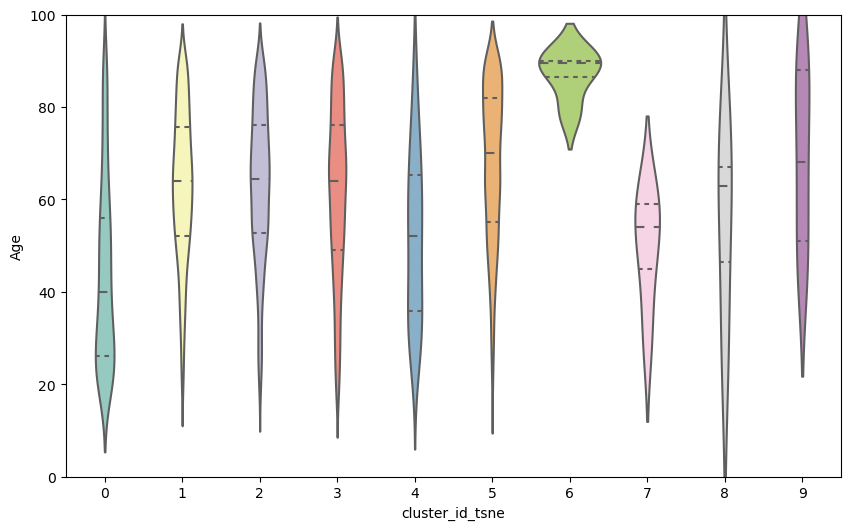

In [15]:
plt.figure(figsize=(10, 6))
# sns.boxplot(x="cluster_id_tsne", y="Age", data=data, palette="Set3")
sns.violinplot(x="cluster_id_tsne", y="Age", data=data, palette="Set3", split=True, inner="quart", fill=False) 
plt.ylim(0, 100)

<Axes: xlabel='cluster_id_tsne'>

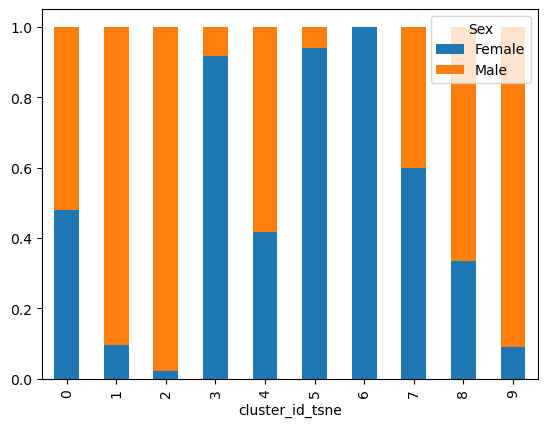

In [5]:
grouped = data.groupby(['cluster_id_tsne', 'Sex']).size().unstack().fillna(0)
grouped_percentage = grouped.divide(grouped.sum(axis=1), axis=0)

# Criando um gráfico de barras empilhado
grouped_percentage.plot(kind='bar', stacked=True)

In [6]:
grouped_percentage

Sex,Female,Male
cluster_id_tsne,,
0,0.479167,0.520833
1,0.096120,0.903880
2,0.022727,0.977273
3,0.916213,0.083787
4,0.416667,0.583333
5,0.939979,0.060021
6,1.000000,0.000000
7,0.600000,0.400000
8,0.333333,0.666667


In [7]:
data.groupby('cluster_id_tsne').size()

cluster_id_tsne
0     336
1    1134
2    1100
3     919
4      60
5     933
6       4
7       5
8       3
9      11
dtype: int64